# Chapter 3 : understanding self attention mechanism

## Understanding self-attention mechanism by code and diagrams

- The goal of self attention is to compute a context vector(z) for each input element(x) - (diagrm below)
- Goal: compute context vectors $z^{(i)}$ for each input sequence element $x^{(i)}$ in $x^{(1)}$ to $x^{(T)}$ (where $z$ and $x$ have the same dimension)
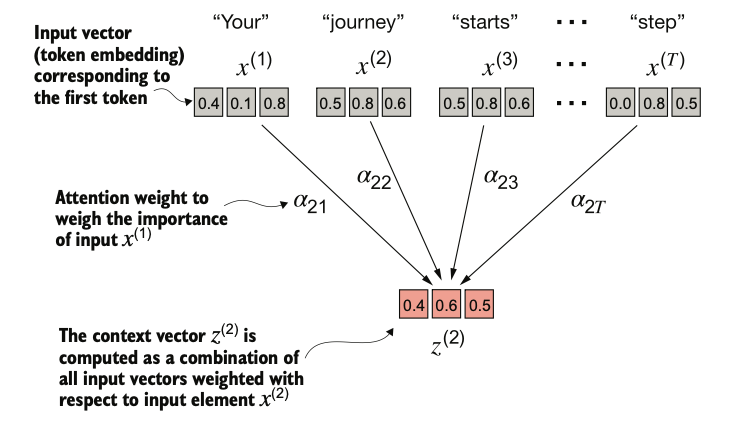
- (Please note that the numbers in this figure are truncated to one digit after the decimal point to reduce visual clutter; similarly, other figures may also contain truncated values)



### Context vectors (z)
- Context vectors play a crucial role in self-attention. Their purpose is to create enriched representations of each element in an input sequence (like a sentence) by incorporating information from all other elements in the sequence.
- ⭐By convention, the unnormalized attention weights are referred to as "attention scores" whereas the normalized attention scores, which sum to 1, are referred to as "attention weights"⭐

- lets implement the simplified version of self attention mechanism in code

In [ ]:
import torch

# below is a sample input sequence of 6 words, each represented by a 3-dimensional vector
# (in practice, these vectors would be of much higher dimension, e.g., 256, 512, etc.)
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

## Its a 3 step process to calculate self attention

1. step 1 - compute unnormalized attention scores "w"
2. step 2 - normalize the unnormalized attention scores ("omegas","w") so that they sum up to 1
3. step3 : compute the context vector by multiplying the embedded input tokens, with the attention weights and sum the resulting vectors

Now calculate the attention score. The "W" is calculated like below .
- ⭐⭐In the context of self-attention mechanisms, the dot product determines the extent to which each element in a sequence focuses on, or “attends to,” any other element: the higher the dot product, the higher the similarity and attention score between two elements.⭐⭐
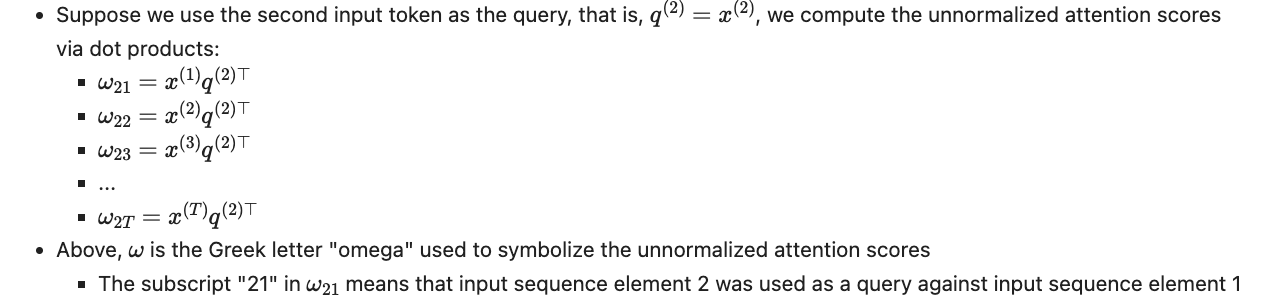
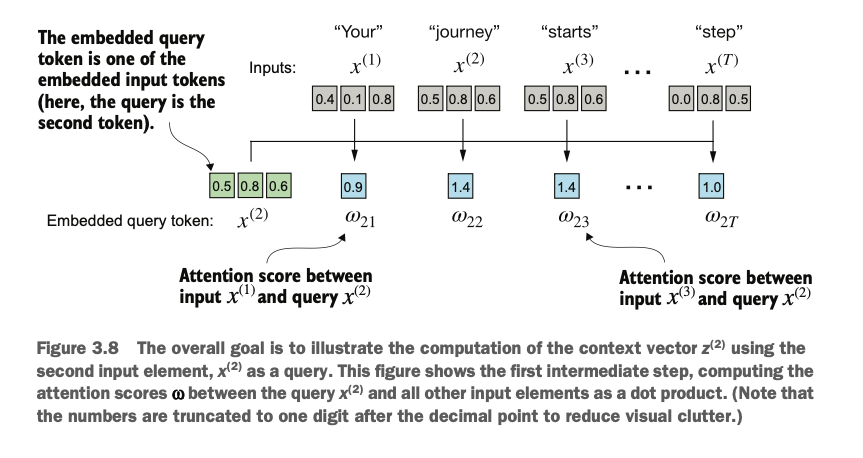



## step 1 - compute unnormalized attention scores "w"

In [ ]:
## step 1 - compute unnormalized attention scores "w"
query = inputs[1]  # 2nd input token is the query

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query) # dot product (transpose not necessary here since they are 1-dim vectors)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


## step 2 : normalize the unnormalized attention scores ("omegas","w") so that they sum up to 

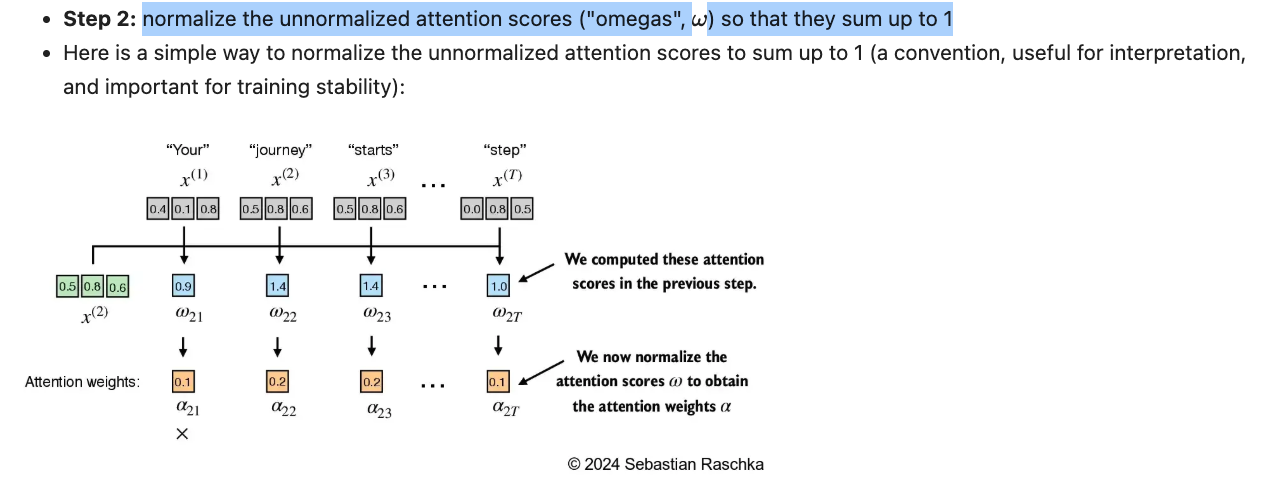

### what exactly happens into normalization step??

What is happening in the normalization step?
Input: Unnormalized Attention Scores (attn_scores_2)

These are raw scores computed using the dot product between the query vector and each input vector.
These scores indicate how much each input token is related to the query token, but they are not yet probabilities.
Normalization Formula:

Here, each unnormalized score is divided by the total sum of all scores.
This ensures that the resulting values (now called attention weights) are scaled to sum up to 1.
Why Normalize?

Normalization converts the raw scores into a probability distribution.
Each attention weight now represents the proportion of "focus" or "importance" the query gives to each input token.
Output: Normalized Attention Weights (attn_weights_2_tmp)

These weights are probabilities (values between 0 and 1) that sum to 1.
They tell us how much attention the query pays to each input token.
Example to Clarify:
Imagine the unnormalized scores are:

Sum of Scores: 2.0 + 1.0 + 3.0 = 6.0
Normalized Weights:
Now, the weights [0.33, 0.17, 0.50] sum to 1 and represent the relative importance of each input token.

Key Takeaway:
The normalization step ensures that the raw attention scores are scaled into probabilities, making it easier to interpret how much "attention" the query gives to each input token.

In [ ]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())  # should be 1.0

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In practice, it’s more common and advisable to use the softmax function for normal-
ization. This approach is better at managing extreme values and offers more favorable gradient properties during training. The following is a basic implementation of the
softmax function for normalizing the attention scores:

In [4]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [5]:
## in practice, it’s advisable to use the PyTorch implementation of softmax, which has been extensively optimized for performance

attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


## step 3 - compute the context vector by multiplying the embedded input tokens, with the attention weights and sum the resulting vectors.
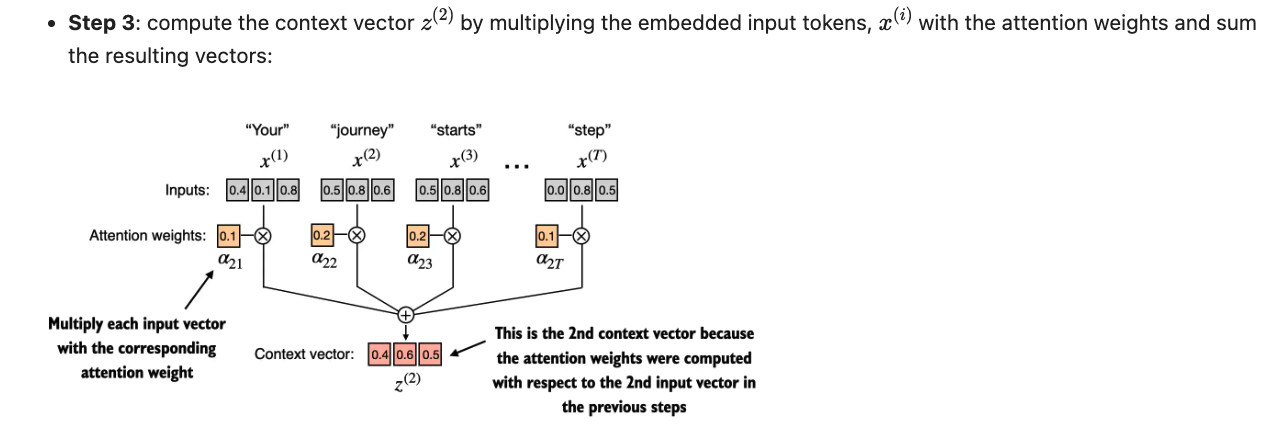

In [8]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


computing the attention weights for all the input tokens, please refer below URL for that. 
https://github.com/rasbt/LLMs-from-scratch/blob/main/ch03/01_main-chapter-code/ch03.ipynb